# Reading data from adc_minimal_block_convert

In [50]:
# Import some useful libraries
import serial, time
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]

## First, open the serial connection

In [52]:
ser = serial.Serial('/dev/ttyACM23', 115200) # Usually ACM0, changes with restarts

## Now we send commands and read the data.

To send a command
    - clear the buffer
    - write command with ser.write('c')
    - wait for a response.

To read back the response for a short response, like the time taken massage returned by 'c'
    - Use ser.read_all()
    
To read back the response when the micro needs to send lots of data
    - Use ser.readline() or ser.read() in a loop. If you read fast enough, you can empty the buffer prematurely so
    - check if the bufer is empty, and if it is, wait and check again before exiting the loop. If not
    - Keep reading until the buffer stays empty
    
I store the values in a list (a) and plot them later.

In [54]:
%%time
r = ser.read_all() # clear serial buffer

# Start a conversion
ser.write(b'c')
print("Check")
while ser.in_waiting < 1:
    pass # wait for a response
    #print("Check1")
time.sleep(0.05) # This extra delay helps with reliability - it gives the micro time to send all it needs to
r = ser.read_all()
print(r) # Prints the time

# Get the values
ser.write(b'p') # Print DMA buffer
while ser.in_waiting < 1:
    pass # wait for a response

a = []
i = 0
while True:
    if ser.in_waiting < 1:
        time.sleep(0.005) # Wait and check again
        if ser.in_waiting < 1:
            break
    b = ser.readline()
    a.append(b)
    i += 1
    
print(len(a), i) # Should be 10000 readings

Check
b'48\r\n1213\r\n1420\r\n1125\r\n1466\r\n1534\r\n1297\r\n1229\r\n1347\r\n1293\r\n968\r\n1072\r\n1339\r\n1391\r\n1332\r\n1430\r\n1025\r\n982\r\n1109\r\n1408\r\n1451\r\n1308\r\n1205\r\n1393\r\n1206\r\n1457\r\n1442\r\n1313\r\n1286\r\n998\r\n1163\r\n737\r\n1023\r\n1091\r\n1098\r\n1182\r\n1233\r\n1116\r\n1116\r\n1115\r\n1055\r\n1078\r\n1491\r\n1318\r\n1255\r\n1334\r\n1311\r\n1405\r\n1010\r\n986\r\n878\r\n1231\r\n1220\r\n1125\r\n1462\r\n1275\r\n1159\r\n1087\r\n1333\r\n1247\r\n1275\r\n1158\r\n1274\r\n1331\r\n1364\r\n1413\r\n911\r\n690\r\n915\r\n940\r\n1087\r\n1330\r\n1543\r\n1146\r\n991\r\n965\r\n1117\r\n1436\r\n1179\r\n797\r\n874\r\n966\r\n1181\r\n1168\r\n1050\r\n1000\r\n1054\r\n1264\r\n1424\r\n1384\r\n1365\r\n1231\r\n1223\r\n1320\r\n1644\r\n1441\r\n1253\r\n958\r\n1157\r\n1213\r\n1417\r\n1160\r\n1150\r\n1243\r\n1022\r\n1278\r\n1097\r\n1117\r\n1436\r\n1180\r\n851\r\n1200\r\n1304\r\n1439\r\n1376\r\n1713\r\n1771\r\n1748\r\n1693\r\n1460\r\n1400\r\n1422\r\n995\r\n1225\r\n1091\r\n1100\r\n1060

NameError: name 'println' is not defined

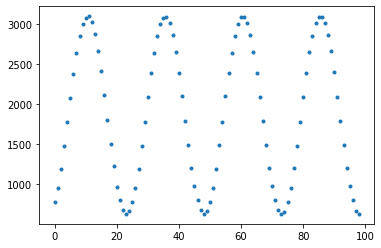

In [49]:
plt.plot([int(n) for n in a[1:100]],".") # microphone heard me whistling

In [6]:
ser.close() # Close the connection when you're done.